<a href="https://colab.research.google.com/github/chaud153/Homework-ME/blob/main/lecturebook/homework/homework-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details
+ **First Name:** Shayak
+ **Last Name:** Chaudhuri
+ **Email:** chaud153@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):** Yes
+ **Which generative AI tool did you use (if applicable)?:** ChatGPT, Gemini

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:**
<br><br>
In order to find the probability that the patient has tuberculosis, we first look at the information provided. It is mentioned that the percentage of the population infected with TB is 0.4%; in probability, we use values ranging from 0 to 1. Since it asks for the base rate/prior probability, we can say that the base rate ($p(B)$) = 0.004.

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:**
<br><br>
This is an example of a sensitivity problem, where we calculate the proportion of true positives in the test performance. In this case, $p(A|B,I)$ would equal 0.8 as it is mentioned "given that the patient has tuberculosis." Thus it can be written in this format: $sensitivity$ = $P(positive|has disease)$ = $P(A|B,I)$.

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**
<br><br>
This time, the question now looks into the false positive rate and also the specificity given the $\neg B$. For this, first we try to find the information, which says that if a patient does not have the disease, then the test comes out negative 90% of the time. This, in turn, is written as $P(\neg A (neg.test)|\neg B,I (no TB)) = 0.9$. We then use the complement $P(A|\neg B,I)$ as $1 - P(\neg A|\neg B,I) = 1-0.9 = 0.1$. Thus the probability that the test is positive given that the patient does not have tuberculosis is 0.1 or 10%.

D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:**
This one now involves the use of Bayes' Theorem. Here we can use Bayes' Theorem to show $P(B|A,I) = \frac{P(A|B,I)P(B)}{P(A,I)}$ and the law of total probability for $P(A,I) = P(A|B,I)P(B) + P(A|\neg B,I)P(\neg B)$. Then, we can use our givens, taken from the previous parts. $P(A|B,I) = sensitivity = 0.8$, $P(B) = (TB Rate) = 0.004$, $P(A\neg B) = 0.1$, and $P(\neg B) = 1-0.004 = 0.996$. Put them together and we get $P(A,I) = (0.8)(0.004)+(0.1)(0.996) = 0.0032 + 0.0996 = 0.1028$. Now we substitute the value into the Bayes' Theorem and we get $P(B|A,I) = \frac{(0.8)(0.004)}{0.1028} ≈ 0.0311 \text{(or 3.11%)}$.
<br><br>

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about the patient? Is the test useful?<br>
**Answer:**
We use Bayes' Theorem again and this time use different complements. The formula now is $P(B|\neg A,I) = \frac{P(\neg A|B,I)P(B)}{P(\neg A,I)}$. $P(\neg A|B,I)$ now represents the false negative rate which is $1-0.8=0.2$.$P(B) = 0.004$, $P(\neg B) = 1-P(B)= 0.996$, and $P(\neg A|\neg B,I) = 1-0.1=0.9$, which is the true negative rate. We now substitute the values calculate through the law of total probability and we get $P(\neg A,I)= (0.2)(0.004)+(0.9)(0.006)= 0.008 + 0.8964 = 0.8972$. We then substitute for the Bayes' Theorem and we get $P(B|\neg A,I) = \frac{0.008}{0.8972} ≈ 0.00089 \text{(or 0.089%)}$.<br><br>Yes. It greatly changes our prior knowledge about the patient as the probability is reduced from 0.4% to 0.089%. The test is useful but has its limitations. One of the strengths is that the negative test provides strogn evidence against TB, and one of the limitations is that a positive test gives only a 3.11% chance of revealing TB in a patient. This marks the equal importance of both sensitivity and specificity in a study.
<br><br>

F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:**
A good test would be when we find values for the sensitivity and the false positive rate so that $P(B|A,I)= 0.99 \text{(or 99%)}$. First, we would use Bayes' Theorem for $P(B|A,I) = \frac{P(A|B,I)P(B)}{P(A,I)}$, where $P(B|A,I) = 0.99, P(B)= 0.004, \text{and the complement, }P(\neg B) = 1-0.004=0.996$. We then go through a series of subsititutions to look for a relationship between $P(A|B,I) \text{ and } P(A|\neg B,I)$. We sub "x" for $P(A|B,I)$ and "y" for $P(A|\neg B,I)$, plug in the values to get to $0.00396x + 0.98504y=0.004x$, and we get that $x=24626y$. We then test out different false positive rates in order to determine when x < 1. We can see through further experimentation that when $FPR = 0.00001 \text{ or (0.001%)}$, then $x = 24626 * 0.0001=024626$. Thus, the sensitivity rate is 0.24626 in order to make $P(\neg B) = 99$.
<br><br>

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**
<br><br>

In [1]:
# Part A: Calculate the expectation E[X]
import numpy as np

# Values and probabilities
x_values = np.array([0, 1, 2, 3])
probabilities = np.array([0.3, 0.1, 0.2, 0.4])

# Expectation
expectation = np.sum(x_values * probabilities)
expectation


1.7000000000000002

B. The variance $\mathbb{V}[X]$.

**Answer:**
<br><br>

In [2]:
# Part B: Calculate the variance V[X]

# First, calculate E[X^2]
expectation_x_squared = np.sum((x_values**2) * probabilities)

# Variance formula: V[X] = E[X^2] - (E[X])^2
variance = expectation_x_squared - (expectation**2)
variance


1.6099999999999994

C. Plot the probability mass function of $X$.

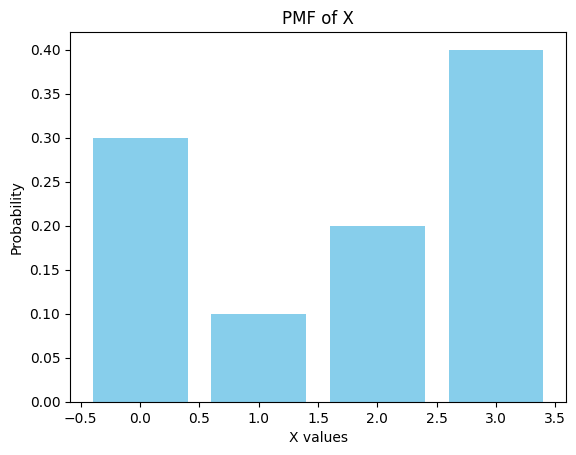

In [4]:
# Part C: Plot the probability mass function (PMF)
import matplotlib.pyplot as plt

# Values and probabilities
x_values = [0, 1, 2, 3]
probabilities = [0.3, 0.1, 0.2, 0.4]

# Create bar plot
plt.bar(x_values, probabilities, color='skyblue')
plt.xlabel('X values')
plt.ylabel('Probability')
plt.title('PMF of X')
plt.show()



D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br><br>

In [5]:
# Part D: Find the probability that X is in {0, 2}

# Sum the probabilities for X = 0 and X = 2
prob_x_in_0_2 = probabilities[0] + probabilities[2]
prob_x_in_0_2


0.5

E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br><br>

In [6]:
# Part E: Find E[4X + 3]

# E[4X + 3] = 4 * E[X] + 3
expectation_transformed = 4 * expectation + 3
expectation_transformed


9.8

F. Find $\mathbb{V}[4X+3]$.

**Answer:**
<br><br>

In [7]:
# Part F: Find V[4X + 3]

# V[4X + 3] = 4^2 * V[X]
variance_transformed = (4**2) * variance
variance_transformed

25.75999999999999

It is also approximately 25.76 when rounded to the nearest hundredth.

## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

<ipython-input-10-8c80012f265e>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", frameon=False)


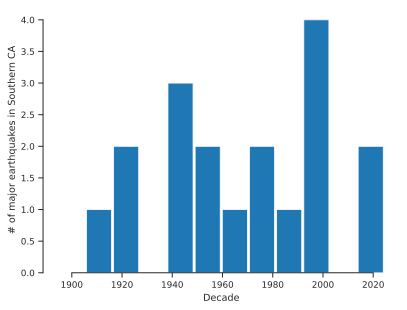

In [10]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [11]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [12]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

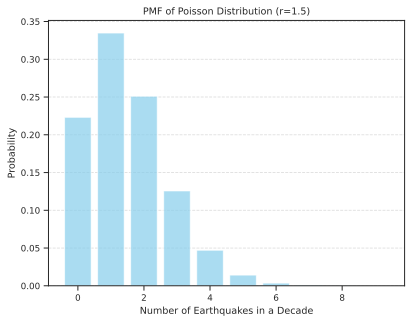

In [13]:
# Import necessary libraries for Poisson distribution and plotting
import scipy.stats as st

# Rate parameter (from the previous calculation, r = 1.50)
r = 1.50

# Define the Poisson distribution
poisson_dist = st.poisson(r)

# Part A: Plot the probability mass function (PMF) of X
x_values = range(0, 10)  # Possible number of earthquakes (0 to 9)
pmf_values = poisson_dist.pmf(x_values)  # Calculate PMF for each value

# Plot the PMF
plt.bar(x_values, pmf_values, color='skyblue', alpha=0.7)
plt.xlabel('Number of Earthquakes in a Decade')
plt.ylabel('Probability')
plt.title('PMF of Poisson Distribution (r=1.5)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [14]:
# Part B: Calculate the probability of at least one major earthquake in the next decade
# P(at least one) = 1 - P(X = 0)
p_at_least_one = 1 - poisson_dist.pmf(0)
p_at_least_one

0.7768698398515702

C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [16]:
# Part C: Probability of at least one earthquake in the next two decades
# For two decades, the rate parameter is doubled: r = 1.5 * 2 = 3.0
r_two_decades = r * 2
poisson_two_decades = st.poisson(r_two_decades)

# P(at least one) = 1 - P(Y = 0)
p_at_least_one_two_decades = 1 - poisson_two_decades.pmf(0)
p_at_least_one_two_decades

0.950212931632136

This makes it a 95% chance of an earthquake in the next two decades.

D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [18]:
# Part D: Probability of at least one earthquake in the next five decades
# For five decades, the rate parameter is multiplied by 5: r = 1.5 * 5 = 7.5
r_five_decades = r * 5
poisson_five_decades = st.poisson(r_five_decades)

# P(at least one) = 1 - P(Y = 0)
p_at_least_one_five_decades = 1 - poisson_five_decades.pmf(0)
p_at_least_one_five_decades

0.9994469156298522

This makes it over 99% possible for an earthquake. It will just be inevitable within the five decades!

## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [ ]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [ ]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (448.066965711728, 0.7099665338918923, 3.4218808260575804, 0.41627831297126994)


Let's plot the fitted Weibul PDF and the data we used:

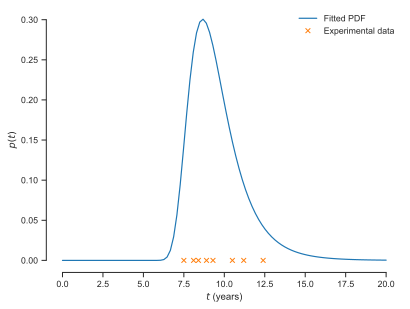

In [ ]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [ ]:
# Your code here
t_mean = 0.0 # Change me
t_var = 0.0 # Change me
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

In [ ]:
# Your code here

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

In [ ]:
# Your code here

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [ ]:
# Your code here

E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.